In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
pd.crosstab(df.Insulin, df.Outcome)

Outcome,0,1
Insulin,,
0,609,347
14,0,3
15,3,0
16,3,0
18,5,0
...,...,...
545,2,0
579,0,4
600,0,2


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [14]:
num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 2000


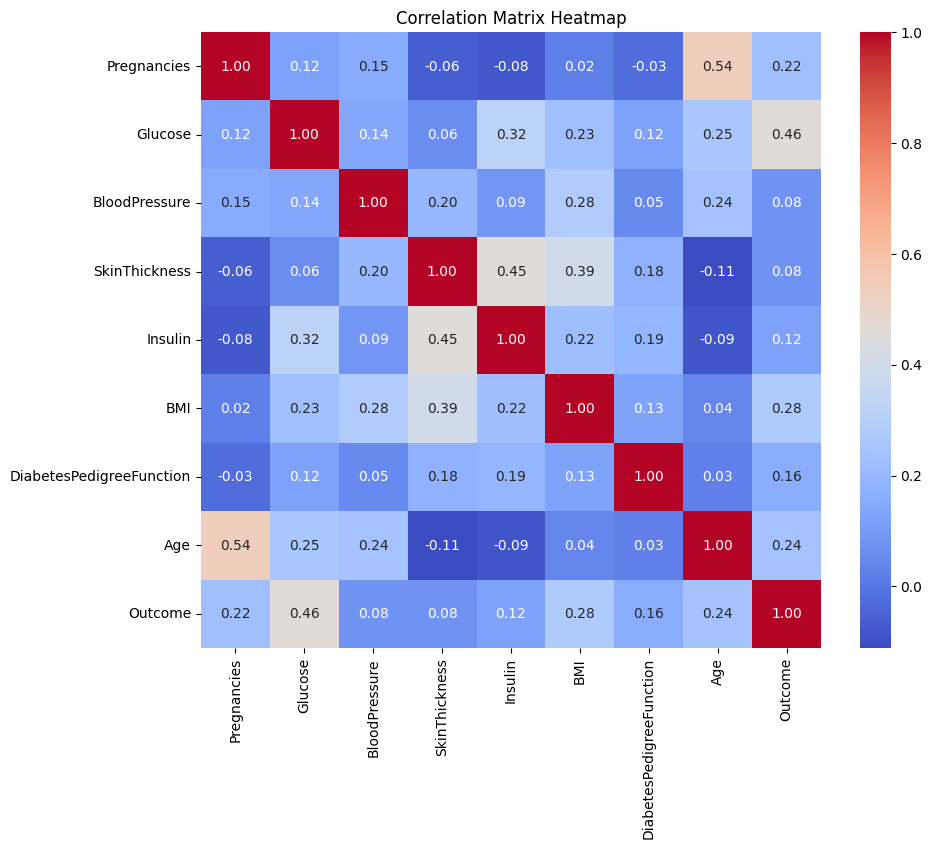

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()


# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
#splitting dataset
y = df['Outcome']
x = df.drop(['Outcome'], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [21]:
#predicting using ytest and RandomForestClassifier
ypred = rf_model.predict(xtest)

In [22]:
#checking accuracy
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(ypred, ytest)

In [23]:
print('the accuracy of the RandomForestClassifier Model is ')
print(model_accuracy)

the accuracy of the RandomForestClassifier Model is 
0.9825


In [24]:
import pickle

file = open("RandomForest.pkl", "wb")
pickle.dump(rf_model, file)